In [3]:
# Standard import
#  conda install --channel https://conda.anaconda.org/menpo opencv3
import cv2
import numpy as np
from matplotlib import pyplot as plt

# read image
file_image = '../images/100865NVG.027.A.BMP'

def show_image(image, name='image'):
    cv2.imshow(name,image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
img = cv2.imread(file_image)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)



Len contours:  65


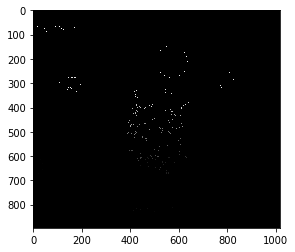

In [51]:
# read image
file_image = '../images/100865NVG.027.A.013.A.BMP'

def show_image(image, name='image'):
    cv2.imshow(name,image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
img = cv2.imread(file_image)

# Step 1: Convert image to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plt.imshow(gray, 'gray')

# Otsu's method without noise filtering
ret1, th1 = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# cv2.imwrite("data/giemsa_raw_thresholded.BMP", th1)
# plt.imshow(th1, 'gray')

# Coutours
im2, contours, hierarchy = cv2.findContours(th1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image_with_contours = cv2.drawContours(gray, contours, -1, (0,255,0), 3)

# print(image_with_contours[0][0])
# show_image(image_with_contours)
# mask for image

# 
mask_contour = np.zeros(image_with_contours.shape)
num_contour = len(contours)

# print(mask_countour.shape)
# print(image_with_contours)

# check every window with windowSize, stepSize: stride
def sliding_window(image, stride, window_size):
    # slide a window across the image
    print("Shape: ", image.shape[0], image.shape[1])
    for y in range(0, image.shape[0], stride):
        for x in range(0, image.shape[1], stride):
            # yield the current window
            print(x, y, x + window_size[0], y +  window_size[1])
            # arr = np.array([x, y, x + windowSize[0], y + windowSize[1] ])
            arr_window = mask_contour[x : x + window_size[0], y : y + window_size[1]]
            num_con_window = np.count_nonzero( np.unique(arr_window) )
            print("Number contour in this window:", num_con_window)
            # yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])
            
print("Len contours: ", len(contours));
cnt = 0
for id, contour in enumerate(contours):
    # print(id, len(c), image_with_contours[c[0][0][0]][c[0][0][1] ] )
#     for j in c:
#         # X: j[0][1], Y: j[0][0]
#         print(image_with_contours[j[0][1]][j[0][0]])
    for point in contour:
        # X: point[0][1], Y: point[0][0]
        x = point[0][1]
        y = point[0][0]
        mask_contour[x][y] = id + 1        
    # print(len(c[0]), c[0][0], type(c[0][0]))
    cnt += len(contour)
plt.imshow(mask_contour, cmap='gray')

# print(cnt)
# print(image_with_contours.shape)

# sliding_window(image_with_contours, 32, (20, 20))



In [3]:
# find the bounding rect, min area rect, and min enclosing circle.
# read and scale down image
img = cv2.pyrDown(cv2.imread(file_image, cv2.IMREAD_UNCHANGED))
 
# threshold image
ret, threshed_img = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),
                127, 255, cv2.THRESH_BINARY)
# find contours and get the external one
image, contours, hier = cv2.findContours(threshed_img, cv2.RETR_TREE,
                cv2.CHAIN_APPROX_SIMPLE)
 
# with each contour, draw boundingRect in green
# a minAreaRect in red and
# a minEnclosingCircle in blue

for c in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)
    # draw a green rectangle to visualize the bounding rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
 
    # get the min area rect
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    # convert all coordinates floating point values to int
    box = np.int0(box)
    # draw a red 'nghien' rectangle
    cv2.drawContours(img, [box], 0, (0, 0, 255))
 
#     # finally, get the min enclosing circle
#     (x, y), radius = cv2.minEnclosingCircle(c)
#     # convert all values to int
#     center = (int(x), int(y))
#     radius = int(radius)
#     # and draw the circle in blue
#     img = cv2.circle(img, center, radius, (255, 0, 0), 2)
 
print(len(contours))

cv2.drawContours(img, contours, -1, (255, 255, 0), 1)
 

show_image(img, "contours")
print(img.shape)


51
(448, 509, 4)


In [6]:
# More on contours, convex hull.
# downscale and read image
img = cv2.pyrDown(cv2.imread(file_image, cv2.IMREAD_UNCHANGED))
# threshold image
ret, threshed_img = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),
                    127, 255, cv2.THRESH_BINARY)
# get contours from image
image, contours, hier = cv2.findContours(threshed_img, cv2.RETR_EXTERNAL,
                    cv2.CHAIN_APPROX_SIMPLE)
 
# for each contour
for cnt in contours:
    # get convex hull
    hull = cv2.convexHull(cnt)
    # draw it in red color
    cv2.drawContours(img, [hull], -1, (0, 0, 255), 1)
 
show_image(img, "contours")
print(img.shape)

(448, 509, 4)


In [4]:
# read and downscale image
img = cv2.pyrDown(cv2.imread(file_image, cv2.IMREAD_UNCHANGED))
# threshold image
# this step is neccessary when you work with contours
ret, threshed_img = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),
                        127, 255, cv2.THRESH_BINARY)
# find contours in image
image, contours, hier = cv2.findContours(threshed_img, cv2.RETR_EXTERNAL,
                        cv2.CHAIN_APPROX_SIMPLE)
 
for cnt in contours:
    # calculate epsilon base on contour's perimeter
    # contour's perimeter is returned by cv2.arcLength
    epsilon = 0.01 * cv2.arcLength(cnt, True)
    # get approx polygons
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    # draw approx polygons
    cv2.drawContours(img, [approx], -1, (0, 255, 0), 1)
 
    # hull is convex shape as a polygon
    hull = cv2.convexHull(cnt)
    cv2.drawContours(img, [hull], -1, (0, 0, 255))
show_image(img, "countours")
print(img.shape)


(448, 509, 4)


In [3]:
# read image
file_image = '../images/100865NVG.027.A.BMP'

def show_image(image, name='image'):
    cv2.imshow(name,image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
img = cv2.imread(file_image)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
ret1, th1 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
 
# Coutours
im2, contours, hierarchy = cv2.findContours(th1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image_with_contours = cv2.drawContours(gray, contours, -1, (0, 255, 0), 3)
 
#
mask_contour = np.zeros(image_with_contours.shape)
mask_contour = mask_contour.astype('int')
num_contour = len(contours)
 
valid = dict()
in_valid = dict()
for i in range(1, num_contour + 1):
    valid[i] = 0
    in_valid[i] = 0
 
 
def sliding_window(image, stride=32, window_size=(20, 20), num_contour_threshold=3):
    # slide a window across the image
    print("Shape: ", image.shape[0], image.shape[1])
    for y in range(0, image.shape[0], stride):
        for x in range(0, image.shape[1], stride):
            # yield the current window
            print(x, y, x + window_size[0], y + window_size[1])
            arr_window = mask_contour[x: x + window_size[0], y: y + window_size[1]]
            unique, counts = np.unique(arr_window, return_counts=True)         
            num_con_window = np.count_nonzero(unique)
            if num_con_window > num_contour_threshold:
                for con_id in unique:
                    if con_id == 0: 
                        continue
                    valid[con_id] = valid[con_id] + 1
            else:
                for con_id in unique:
                    if con_id == 0: 
                        continue
                    in_valid[con_id] = in_valid[con_id] + 1
            if num_con_window >= 2:
                print(x, y, x + window_size[0], y + window_size[1])
                print("Contours in this window:", unique[1:])
 
 
print("Len contours: ", len(contours));
cnt = 0
for id, contour in enumerate(contours):
    for point in contour:
        # X: point[0][1], Y: point[0][0]
        x = point[0][1]
        y = point[0][0]
        mask_contour[x][y] = id + 1
    cnt += len(contour)
 
print(image_with_contours.shape)
 
sliding_window(image_with_contours, 20, (100, 100))
print(valid)
print(in_valid)
chosen_contours = list()
accept_ratio = 2
new_contours = list()
for i in range(1, num_contour + 1):
    if valid[i] * accept_ratio < in_valid[i]:
        new_contours.append(contours[i - 1])
 
 
white_image = 255 - np.zeros_like(gray)
new_image_with_contours = cv2.drawContours(white_image, new_contours, contourIdx=-1, color=2, thickness=1)
# print(new_contours)
# plt.imshow(new_image_with_contours, cmap='gray')
show_image(new_image_with_contours)

Len contours:  177
(896, 1017)
Shape:  896 1017
0 0 100 100
20 0 120 100
40 0 140 100
40 0 140 100
Contours in this window: [49 50]
60 0 160 100
60 0 160 100
Contours in this window: [48 49 50]
80 0 180 100
80 0 180 100
Contours in this window: [48 49 50]
100 0 200 100
100 0 200 100
Contours in this window: [48 49 50]
120 0 220 100
120 0 220 100
Contours in this window: [48 49 50]
140 0 240 100
140 0 240 100
Contours in this window: [48 50]
160 0 260 100
180 0 280 100
180 0 280 100
Contours in this window: [ 47  50 156 160]
200 0 300 100
200 0 300 100
Contours in this window: [ 35  36  38  44  47  50 156 160]
220 0 320 100
220 0 320 100
Contours in this window: [ 34  35  36  38  44  47  50 156 160]
240 0 340 100
240 0 340 100
Contours in this window: [ 22  26  27  30  31  34  35  36  38  44  47  50 156 160]
260 0 360 100
260 0 360 100
Contours in this window: [ 18  20  22  26  27  30  31  34  35  36  38  44  47  50 156 160]
280 0 380 100
280 0 380 100
Contours in this window: [10 12 13

Contours in this window: [ 2  5  7  8  9 50 78 80 90]
400 80 500 180
400 80 500 180
Contours in this window: [50 78 80]
420 80 520 180
440 80 540 180
460 80 560 180
480 80 580 180
500 80 600 180
520 80 620 180
540 80 640 180
560 80 660 180
580 80 680 180
600 80 700 180
620 80 720 180
640 80 740 180
660 80 760 180
660 80 760 180
Contours in this window: [52 53]
680 80 780 180
680 80 780 180
Contours in this window: [52 53 57 58 59 60 61]
700 80 800 180
700 80 800 180
Contours in this window: [52 53 57 58 59 60 61]
720 80 820 180
720 80 820 180
Contours in this window: [52 53 57 58 59 60 61]
740 80 840 180
740 80 840 180
Contours in this window: [52 53 57 58 59 60 61]
760 80 860 180
760 80 860 180
Contours in this window: [53 57 58 59 60 61]
780 80 880 180
800 80 900 180
820 80 920 180
840 80 940 180
860 80 960 180
880 80 980 180
900 80 1000 180
920 80 1020 180
940 80 1040 180
960 80 1060 180
980 80 1080 180
1000 80 1100 180
0 100 100 200
20 100 120 200
40 100 140 200
60 100 160 200
80 1

540 180 640 280
560 180 660 280
580 180 680 280
600 180 700 280
620 180 720 280
640 180 740 280
660 180 760 280
680 180 780 280
700 180 800 280
720 180 820 280
740 180 840 280
760 180 860 280
780 180 880 280
800 180 900 280
820 180 920 280
840 180 940 280
860 180 960 280
880 180 980 280
900 180 1000 280
920 180 1020 280
940 180 1040 280
960 180 1060 280
980 180 1080 280
1000 180 1100 280
0 200 100 300
20 200 120 300
40 200 140 300
60 200 160 300
80 200 180 300
100 200 200 300
120 200 220 300
140 200 240 300
160 200 260 300
180 200 280 300
200 200 300 300
220 200 320 300
240 200 340 300
260 200 360 300
280 200 380 300
300 200 400 300
320 200 420 300
340 200 440 300
360 200 460 300
380 200 480 300
400 200 500 300
420 200 520 300
440 200 540 300
460 200 560 300
480 200 580 300
500 200 600 300
520 200 620 300
540 200 640 300
560 200 660 300
580 200 680 300
600 200 700 300
620 200 720 300
640 200 740 300
660 200 760 300
680 200 780 300
700 200 800 300
720 200 820 300
740 200 840 300
760 200

20 380 120 480
40 380 140 480
60 380 160 480
80 380 180 480
100 380 200 480
120 380 220 480
140 380 240 480
140 380 240 480
Contours in this window: [169 170 171]
160 380 260 480
160 380 260 480
Contours in this window: [163 164 165 169 170 171]
180 380 280 480
180 380 280 480
Contours in this window: [163 164 165 169 170 171]
200 380 300 480
200 380 300 480
Contours in this window: [150 152 153 163 164 165 169 170 171]
220 380 320 480
220 380 320 480
Contours in this window: [120 150 152 153 163 164 165 169 170 171]
240 380 340 480
240 380 340 480
Contours in this window: [106 108 112 120 150 152 153 163 164 165 169]
260 380 360 480
260 380 360 480
Contours in this window: [ 96 104 106 107 108 112 120 150 152 153 163 164]
280 380 380 480
280 380 380 480
Contours in this window: [ 96  99 104 106 107 108 112 120 150 152 153 163]
300 380 400 480
300 380 400 480
Contours in this window: [ 96  98  99 104 106 107 108 112 120 150 152]
320 380 420 480
320 380 420 480
Contours in this window: 

Contours in this window: [ 81  87  89  91  92  95  96 100 106 108 110 113 114 115 116 119 120 121]
340 460 440 560
340 460 440 560
Contours in this window: [ 69  77  81  87  89  91  92  95  96 100 106 108 110 113 114 115 116]
360 460 460 560
360 460 460 560
Contours in this window: [ 67  69  70  77  81  87  89  91  92  95  96 100 106 113 114 115]
380 460 480 560
380 460 480 560
Contours in this window: [ 65  66  67  69  70  77  81  87  89  91  92  95  96 106]
400 460 500 560
400 460 500 560
Contours in this window: [65 66 67 69 70 77 81 87 91 92]
420 460 520 560
420 460 520 560
Contours in this window: [65 66 67 69 70 77 81 87 91]
440 460 540 560
440 460 540 560
Contours in this window: [65 66 67 69 70 77]
460 460 560 560
460 460 560 560
Contours in this window: [65 66 67 69 70 77]
480 460 580 560
500 460 600 560
520 460 620 560
540 460 640 560
560 460 660 560
580 460 680 560
600 460 700 560
620 460 720 560
640 460 740 560
660 460 760 560
680 460 780 560
700 460 800 560
720 460 820 560

280 560 380 660
Contours in this window: [ 94 101 102 103 109 117 118 149 158 161 162 166]
300 560 400 660
300 560 400 660
Contours in this window: [ 84  85  87  94 101 102 103 109 117 118 149 161]
320 560 420 660
320 560 420 660
Contours in this window: [ 84  85  86  87  94 101 102 103 109 117 118 149]
340 560 440 660
340 560 440 660
Contours in this window: [ 71  77  84  85  86  87  94 101 102 103 109]
360 560 460 660
360 560 460 660
Contours in this window: [ 71  72  77  84  85  86  87  94 101 102 103]
380 560 480 660
380 560 480 660
Contours in this window: [ 65  71  72  77  84  85  86  87  94 101]
400 560 500 660
400 560 500 660
Contours in this window: [65 71 72 77 84 85 86 87]
420 560 520 660
420 560 520 660
Contours in this window: [65 71 72 77 85 87]
440 560 540 660
440 560 540 660
Contours in this window: [65 71 72]
460 560 560 660
460 560 560 660
Contours in this window: [65 71]
480 560 580 660
500 560 600 660
520 560 620 660
540 560 640 660
560 560 660 660
580 560 680 660
6

80 660 180 760
100 660 200 760
120 660 220 760
140 660 240 760
160 660 260 760
180 660 280 760
200 660 300 760
220 660 320 760
240 660 340 760
260 660 360 760
280 660 380 760
300 660 400 760
320 660 420 760
340 660 440 760
360 660 460 760
380 660 480 760
400 660 500 760
420 660 520 760
440 660 540 760
460 660 560 760
480 660 580 760
500 660 600 760
520 660 620 760
540 660 640 760
560 660 660 760
580 660 680 760
600 660 700 760
620 660 720 760
640 660 740 760
660 660 760 760
680 660 780 760
700 660 800 760
720 660 820 760
740 660 840 760
760 660 860 760
780 660 880 760
800 660 900 760
820 660 920 760
840 660 940 760
860 660 960 760
880 660 980 760
900 660 1000 760
920 660 1020 760
940 660 1040 760
960 660 1060 760
980 660 1080 760
1000 660 1100 760
0 680 100 780
20 680 120 780
40 680 140 780
60 680 160 780
80 680 180 780
100 680 200 780
120 680 220 780
140 680 240 780
160 680 260 780
180 680 280 780
200 680 300 780
220 680 320 780
240 680 340 780
260 680 360 780
280 680 380 780
300 680 

20 860 120 960
40 860 140 960
60 860 160 960
80 860 180 960
100 860 200 960
120 860 220 960
140 860 240 960
160 860 260 960
180 860 280 960
200 860 300 960
200 860 300 960
Contours in this window: [122 123 124]
220 860 320 960
220 860 320 960
Contours in this window: [122 123 124 143 144 145 146 147]
240 860 340 960
240 860 340 960
Contours in this window: [122 123 124 139 143 144 145 146 147]
260 860 360 960
260 860 360 960
Contours in this window: [122 123 124 139 143 144 145 146 147]
280 860 380 960
280 860 380 960
Contours in this window: [122 123 124 135 137 138 139 143 144 145 146 147]
300 860 400 960
300 860 400 960
Contours in this window: [ 82  83  88 124 130 131 132 133 134 135 137 138 139 143 144 145 146 147]
320 860 420 960
320 860 420 960
Contours in this window: [ 82  83  88 124 127 130 131 132 133 134 135 137 138 139]
340 860 440 960
340 860 440 960
Contours in this window: [ 68  74  75  76  82  83  88 124 125 127 130 131 132 133 134 135 137 138]
360 860 460 960
360 860 